
# Ungraded Lab: First Autoencoder

In this lab, you will build your first simple autoencoder. This will take in three-dimensional data, encodes it to two dimensions, and decodes it back to 3D.

https://github.com/sasidhar-programmer/Tensorflow_Advance_Techniques/blob/main/4-Generative-deeplearning-with-tensorflow/week-2/C4_W2_Lab_1_FirstAutoEncoder.ipynb


In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# first create a fake dataset to be the input for the encoder

def generate_data(m):
    '''plots random points on the 3d plane'''
    angles = np.random.rand(m) * 3 *np.pi / 2 - 0.5
    data = np.empty((m,3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.rand(m)/ 2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.rand(m)/ 2
    data[:,2] = data[:,0] * 0.1 + data[:,1] * 0.3 + 0.1 * np.random.randn(m)
    
    return data

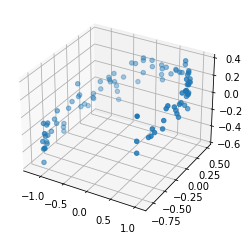

In [9]:
X_train = generate_data(100)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

# preview le data
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0], X_train[:,1], X_train[:,2], cmap='Reds');


# Build the Model

Now you will build the simple encoder-decoder model. Notice the number of neurons in each Dense layer. The model will contract in the encoder then expand in the decoder.


In [10]:
encoder = keras.models.Sequential([
    keras.layers.Dense(2, input_shape=[3])
])

decoder = keras.models.Sequential([
    keras.layers.Dense(3,input_shape=[2])
])


autoencoder = keras.models.Sequential([encoder, decoder])

In [12]:
autoencoder.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=0.1))


# Train the Model

You will configure the training to also use the input data as your target output. In our example, that will be X_train.


In [13]:
# the best encoder is the one that can produce the same input data back to me
history = autoencoder.fit(X_train, X_train, epochs=200)

Epoch 1/200
4/4 [==============================] - 1s 3ms/step - loss: 0.2498
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.2051
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1680
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1358
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.1087
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0884
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0709
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0597
Epoch 9/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0496
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0448
Epoch 11/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0421
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.0402
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

Text(0, 0.5, 'loss')

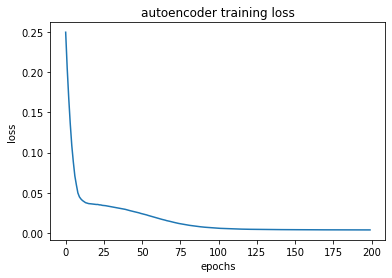

In [26]:
plt.rcParams['figure.facecolor']='w'
plt.plot(np.arange(200), history.history["loss"])
plt.title('autoencoder training loss')
plt.xlabel("epochs")
plt.ylabel("loss")


# Plot the encoder output

As mentioned, you can use the encoder to compress the input to two dimensions.


In [24]:
# encoding the data
codings = encoder.predict(X_train)

# see a sample input and encoded-input pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

input point: [-0.9596463  -0.03597583 -0.18458855]
encoded point: [-0.08038899 -1.0013436 ]


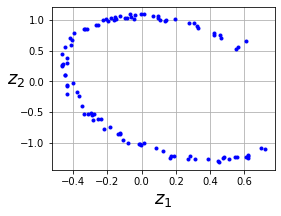

In [25]:


# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()




# Plot the Decoder output

The decoder then tries to reconstruct the original input. See the outputs below. You will see that although not perfect, it still follows the general shape of the original input.


In [27]:

# decode the encoder output
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')



input point: [-0.9596463  -0.03597583 -0.18458855]
encoded point: [-0.08038899 -1.0013436 ]
decoded point: [-0.9823764  -0.02475421 -0.09309088]


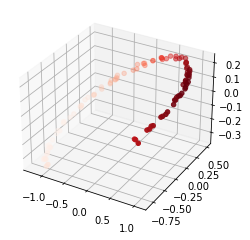

In [28]:


# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

